In [2]:
import sys
import time
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, matplotlib.image as mpimg
%matplotlib inline

labeled_images = pd.read_csv('First_assigment_handwritten_digits/train.csv')
images = labeled_images.iloc[:,1:]
labels = labeled_images.iloc[:,:1]

In [434]:
def forward(X, W, b, output_size, lambd = 0):
    assert W.shape == (X.shape[1], output_size)
    assert b.shape == (1, output_size)
    Z = np.dot(X, W) + b
    A = np.exp(Z)
    s = np.sum(A, axis = 1).reshape((X.shape[0], 1))
    A = (A / s) + 1e-15
    
    return A

def backward(X, Y, A):
    dZ = A - Y
    dW = np.dot(X.T, dZ) / X.shape[0]
    db = np.sum(dZ, axis = 0) / X.shape[0]
    
    return dW, db

def update(X, Y, W, b, output_size, learning_rate):
    A = forward(X, W, b, output_size)
    dW, db = backward(X, Y, A)
    
    J = -np.trace(np.dot(Y, np.log(A).T)) / X.shape[0]
    
    return W - learning_rate * dW, b - learning_rate * db, J

def predict(X, W, b, output_size):
    A = forward(X, W, b, output_size)
    return np.argmax(A, axis = 1)

0.9713
Wall time: 52.3 s


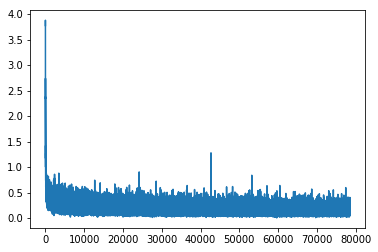

In [570]:
%%time
m = 10000
alpha = 0.1
lambd = 0
minibatch_size = 64
iters = 500

X = images.values[:m, :] / 256.
Y = np.zeros((m, 10), dtype = np.int32)
for i in range(m):
    Y[i, labels.values[i, :]] = 1

W = np.random.rand(X.shape[1], 10)
b = np.random.rand(1, 10)

scores = np.array([])

for epoch in range(iters):
    order = np.random.permutation(m)
    epoch_score = 0
    
    for i in range(0, m, minibatch_size):
        W, b, J = update(X[order[i : i + minibatch_size],:],\
                         Y[order[i : i + minibatch_size],:],\
                         W, b, 10, alpha)
        #epoch_score += J
        scores = np.append(scores, J)
    
print(np.sum(predict(X, W, b, 10) == labels.values[:m, :].reshape((m, ))) / m)
plt.plot(scores)

In [442]:
m_test = 10000
X_test = images.values[m : m + m_test, :] / 256.
np.sum(predict(X_test, W, b, 10) == labels.values[m : m + m_test, :].reshape((m_test, ))) / m_test

0.898

In [562]:
def get_model(name):
    x = tf.placeholder(tf.float32, [None, 784], name = 'x' + name)
    y = tf.placeholder(tf.float32, [None, 10], name = 'y' + name)
    out = tf.contrib.layers.fully_connected(x, 10, activation_fn = None)
    model = tf.nn.softmax(out)
    cost = tf.losses.softmax_cross_entropy(onehot_labels = y, logits = out)
    return model, cost

0.9713
Wall time: 1min 36s


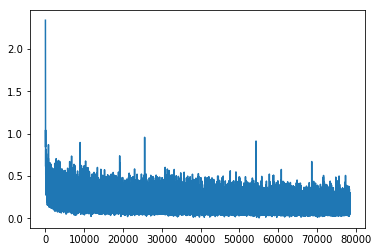

In [579]:
%%time
import time

name = str(time.time())
model, cost = get_model(name)
optimizer = tf.train.GradientDescentOptimizer(alpha).minimize(cost)
init = tf.global_variables_initializer()

scores = np.array([])

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(iters):
        order = np.random.permutation(m)

        for i in range(0, m, minibatch_size):
            _, J = sess.run([optimizer, cost], feed_dict = {'x' + name + ':0' : X[order[i : i + minibatch_size],:],\
                                                            'y' + name + ':0' : Y[order[i : i + minibatch_size],:]})
            scores = np.append(scores, J)
    predictions = sess.run([model], feed_dict = {'x' + name + ':0' : X, 'y' + name + ':0' : Y})[0]
print(np.sum(np.argmax(predictions, axis = 1) == np.argmax(Y, axis = 1)) / m)
plt.plot(scores)

In [585]:
J

0.29954842

Epoch #0 ended and took 1.1 seconds
Epoch #1 ended and took 0.87 seconds
Epoch #2 ended and took 0.85 seconds
Epoch #3 ended and took 0.82 seconds
Epoch #4 ended and took 0.9 seconds
Epoch #5 ended and took 0.77 seconds
Epoch #6 ended and took 0.84 seconds
Epoch #7 ended and took 0.86 seconds
Epoch #8 ended and took 0.8 seconds
Epoch #9 ended and took 0.93 seconds
Epoch #10 ended and took 0.99 seconds
Epoch #11 ended and took 0.81 seconds
Epoch #12 ended and took 0.86 seconds
Epoch #13 ended and took 0.95 seconds
Epoch #14 ended and took 0.82 seconds
Epoch #15 ended and took 0.96 seconds
Epoch #16 ended and took 1.0 seconds
Epoch #17 ended and took 0.78 seconds
Epoch #18 ended and took 0.96 seconds
Epoch #19 ended and took 0.96 seconds
Epoch #20 ended and took 1.1 seconds
Epoch #21 ended and took 0.89 seconds
Epoch #22 ended and took 0.84 seconds
Epoch #23 ended and took 0.84 seconds
Epoch #24 ended and took 0.98 seconds
Epoch #25 ended and took 0.9 seconds
Epoch #26 ended and took 0.8

Epoch #215 ended and took 0.88 seconds
Epoch #216 ended and took 0.96 seconds
Epoch #217 ended and took 0.88 seconds
Epoch #218 ended and took 0.88 seconds
Epoch #219 ended and took 0.93 seconds
Epoch #220 ended and took 1.0 seconds
Epoch #221 ended and took 0.94 seconds
Epoch #222 ended and took 1.0 seconds
Epoch #223 ended and took 0.9 seconds
Epoch #224 ended and took 0.9 seconds
Epoch #225 ended and took 1.2 seconds
Epoch #226 ended and took 1.1 seconds
Epoch #227 ended and took 1.3 seconds
Epoch #228 ended and took 1.3 seconds
Epoch #229 ended and took 1.0 seconds
Epoch #230 ended and took 0.95 seconds
Epoch #231 ended and took 1.1 seconds
Epoch #232 ended and took 1.5 seconds
Epoch #233 ended and took 1.1 seconds
Epoch #234 ended and took 1.1 seconds
Epoch #235 ended and took 1.2 seconds
Epoch #236 ended and took 1.0 seconds
Epoch #237 ended and took 0.93 seconds
Epoch #238 ended and took 1.2 seconds
Epoch #239 ended and took 1.1 seconds
Epoch #240 ended and took 1.2 seconds
Epoc

Epoch #428 ended and took 1.0 seconds
Epoch #429 ended and took 1.0 seconds
Epoch #430 ended and took 1.0 seconds
Epoch #431 ended and took 1.0 seconds
Epoch #432 ended and took 1.0 seconds
Epoch #433 ended and took 1.0 seconds
Epoch #434 ended and took 1.0 seconds
Epoch #435 ended and took 1.0 seconds
Epoch #436 ended and took 1.0 seconds
Epoch #437 ended and took 1.0 seconds
Epoch #438 ended and took 1.0 seconds
Epoch #439 ended and took 1.1 seconds
Epoch #440 ended and took 1.2 seconds
Epoch #441 ended and took 1.0 seconds
Epoch #442 ended and took 1.0 seconds
Epoch #443 ended and took 1.0 seconds
Epoch #444 ended and took 1.0 seconds
Epoch #445 ended and took 1.0 seconds
Epoch #446 ended and took 1.0 seconds
Epoch #447 ended and took 1.0 seconds
Epoch #448 ended and took 1.0 seconds
Epoch #449 ended and took 1.0 seconds
Epoch #450 ended and took 1.0 seconds
Epoch #451 ended and took 1.0 seconds
Epoch #452 ended and took 1.0 seconds
Epoch #453 ended and took 1.0 seconds
Epoch #454 e

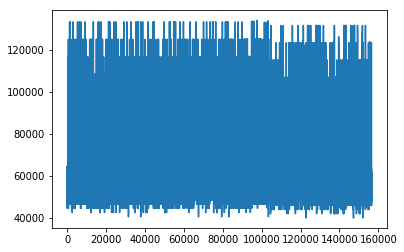

In [260]:
def get_l2_model(layers, last_layer_activation_fn = None):
    x = tf.placeholder(tf.float64, [None, 784])
    y = tf.placeholder(tf.float64, [None, None])
    
    out = x
    for layer in layers[:-1]:
        out = tf.contrib.layers.fully_connected(out, layer, activation_fn = tf.nn.relu)
    out = tf.contrib.layers.fully_connected(out, layers[-1], activation_fn = last_layer_activation_fn)
    
    dist = tf.matmul(out, tf.transpose(out))
    norms = tf.reshape(tf.diag_part(dist), [-1, 1])
    dist = (-2*dist + norms) + tf.transpose(norms) + 1e-6
    
    m = tf.shape(x)[0]
    m = m*(m-1) / 2
    cost = tf.reduce_sum(tf.multiply(y, dist) + tf.divide(1-y, dist)) / m
    
    return x, y, out, cost


m = 10000
iters = 500
minibatch_size = 32

t = 10000

X = images.values[:m, :] / 256.
Y = np.zeros((m, m), dtype = np.float64)
for i in range(m):
    Y[i, :] = np.float64(labels.values[:m, :] == labels.values[i]).reshape(m,)
    
X_test = images.values[m:m+t, :] / 256.
Y_test = np.zeros((t, t), dtype = np.float64)
for i in range(t):
    Y[i, :] = np.float64(labels.values[m:m+t, :] == labels.values[i]).reshape(t,)
    
x, y, out, cost = get_l2_model([50, 10])
optimizer = tf.train.AdamOptimizer().minimize(cost)
init = tf.global_variables_initializer()

scores = np.array([])

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(iters):
        start = time.time()
        
        order = np.random.permutation(m)

        for i in range(0, m, minibatch_size):
            indices = order[i : i + minibatch_size]
            _, J = sess.run([optimizer, cost], feed_dict = {x : X[indices,:], y : Y[indices, :][:, indices]})
            
            scores = np.append(scores, J)
            
        end = time.time()
        print('Epoch #{} ended and took {:.2} seconds'.format(epoch, end - start))
        sys.stdout.flush()
    predictions, = sess.run([out], feed_dict = {x : X_test, y : Y_test})
plt.plot(scores)

In [264]:
p = np.array([predictions[np.where(labels.values == i)[0][0], :] for i in range(10)])
pred = np.array([])
for u in range(X_test.shape[0]):
    pred = np.append(pred, np.argmin(np.linalg.norm(p - predictions[u, :], axis = 1)))

In [265]:
np.sum(pred == labels.values[m:m+t].reshape((-1,)))

1190